In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyresample as pyr
from pyresample import kd_tree, geometry

### Longitude and latitude arrays of original swath

In [6]:
lons = np.linspace(-55, -21, 1000)
lats = np.linspace(71, 68, 1000)
lonslons, latslats = np.meshgrid(lons, lats)

In [7]:
lonslons

array([[-55.        , -54.96596597, -54.93193193, ..., -21.06806807,
        -21.03403403, -21.        ],
       [-55.        , -54.96596597, -54.93193193, ..., -21.06806807,
        -21.03403403, -21.        ],
       [-55.        , -54.96596597, -54.93193193, ..., -21.06806807,
        -21.03403403, -21.        ],
       ...,
       [-55.        , -54.96596597, -54.93193193, ..., -21.06806807,
        -21.03403403, -21.        ],
       [-55.        , -54.96596597, -54.93193193, ..., -21.06806807,
        -21.03403403, -21.        ],
       [-55.        , -54.96596597, -54.93193193, ..., -21.06806807,
        -21.03403403, -21.        ]])

In [8]:
latslats

array([[71.        , 71.        , 71.        , ..., 71.        ,
        71.        , 71.        ],
       [70.996997  , 70.996997  , 70.996997  , ..., 70.996997  ,
        70.996997  , 70.996997  ],
       [70.99399399, 70.99399399, 70.99399399, ..., 70.99399399,
        70.99399399, 70.99399399],
       ...,
       [68.00600601, 68.00600601, 68.00600601, ..., 68.00600601,
        68.00600601, 68.00600601],
       [68.003003  , 68.003003  , 68.003003  , ..., 68.003003  ,
        68.003003  , 68.003003  ],
       [68.        , 68.        , 68.        , ..., 68.        ,
        68.        , 68.        ]])

In [9]:
lonslons, latslats

(array([[-55.        , -54.96596597, -54.93193193, ..., -21.06806807,
         -21.03403403, -21.        ],
        [-55.        , -54.96596597, -54.93193193, ..., -21.06806807,
         -21.03403403, -21.        ],
        [-55.        , -54.96596597, -54.93193193, ..., -21.06806807,
         -21.03403403, -21.        ],
        ...,
        [-55.        , -54.96596597, -54.93193193, ..., -21.06806807,
         -21.03403403, -21.        ],
        [-55.        , -54.96596597, -54.93193193, ..., -21.06806807,
         -21.03403403, -21.        ],
        [-55.        , -54.96596597, -54.93193193, ..., -21.06806807,
         -21.03403403, -21.        ]]),
 array([[71.        , 71.        , 71.        , ..., 71.        ,
         71.        , 71.        ],
        [70.996997  , 70.996997  , 70.996997  , ..., 70.996997  ,
         70.996997  , 70.996997  ],
        [70.99399399, 70.99399399, 70.99399399, ..., 70.99399399,
         70.99399399, 70.99399399],
        ...,
        [68.006006

### Z value represents data and is arbitrary in this case, just made it look cool

In [10]:
z = lonslons *latslats *np.sin((lonslons + 55) / 34 * 2 * np.pi) 
swath_def = geometry.SwathDefinition(lons = lonslons, lats = latslats)

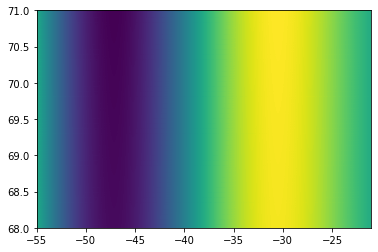

In [11]:
plt.pcolormesh(lons, lats, z)

### Area of new common grid in different coordinate system

In [ ]:
area_id = 'ease'
description = 'ease grid north'
proj_id = 'WGS 84'
proj_string = 'EPSG:6931'
width = 1000
height = 1000
area_extent = (-2286563, -2336644, -544973, -880249)
area_def = geometry.AreaDefinition(area_id, description, proj_id, proj_string, width, height, area_extent)

### xe = xedge

In [ ]:
xe = np.linspace(-2286563, -544973, 1001)
ye = np.linspace(-2336644, -880249, 1001)
xx, yy = np.meshgrid(xe, ye)

### result = z values of the new coordinate system

In [ ]:
result = kd_tree.resample_nearest(swath_def, z, area_def, radius_of_influence=34000, fill_value=np.nan)
plt.imshow(result)